## Experiment 4: Custom CNN architecture with RMSprop

**Step 1: Importing libraries**

In [1]:
import os, datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras import regularizers
from keras.regularizers import l1
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Step 2: Image Data Generator For Train dataset**

In [2]:
base_path ='/home/jovyan/kaggle image/real-vs-fake/'

image_gen = ImageDataGenerator(rescale=1./255.)

train_data = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size = 64,
    class_mode ='binary'
)
print("Training Data Classes :",train_data.class_indices)

Found 100000 images belonging to 2 classes.
Training Data Classes : {'fake': 0, 'real': 1}


**Step 3: Image Data Generator For Valid dataset**

In [3]:
image_gen_valid = ImageDataGenerator(rescale=1./255.)

valid_data = image_gen_valid.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size= 64,
    class_mode = 'binary'
)
print("validation Data Classes :",valid_data.class_indices)

Found 20000 images belonging to 2 classes.
validation Data Classes : {'fake': 0, 'real': 1}


**Step 4: Image Data Generator For Test dataset**

In [4]:
image_gen_test = ImageDataGenerator(rescale=1./255.)

test_data = image_gen_test.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size= 1,
    shuffle = False,
    class_mode = 'binary'
)
print("Test Dataset classes:",test_data.class_indices)

Found 20000 images belonging to 2 classes.
Test Dataset classes: {'fake': 0, 'real': 1}


**Step 5: Input Image Data Samples of Real and Fake class**

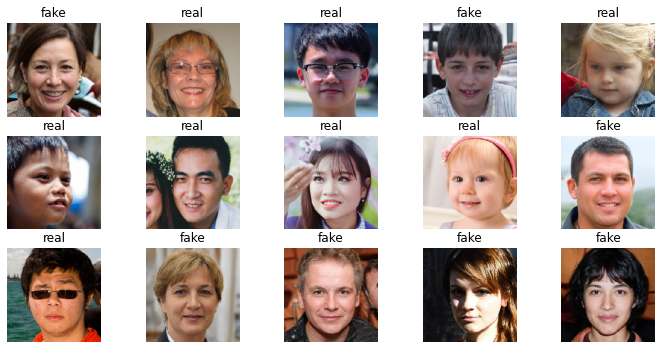

In [5]:
plt.figure(figsize=(12,10))
for i in range(15):
    img, label = train_data.next()
    ax = plt.subplot(5,5, i+ 1)
    plt.imshow(img[0])
    if (label[0]) == 0.0:
        plt.title("fake")
    else:
        plt.title("real")
    plt.axis('off')

**Step 6: Custom CNN Model Architecture**

In [6]:

epsilon_BN=0.001
input_shapes= (150, 150, 3)

model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.BatchNormalization(input_shape=input_shapes))
model.add(keras.layers.Conv2D(8,(3,3),activation='relu', padding = "same"))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.BatchNormalization(epsilon=epsilon_BN))
model.add(keras.layers.Conv2D(16,(3,3),activation='relu', padding = "same"))
model.add(keras.layers.MaxPool2D(2,2))


# Convolutional layer and maxpool layer 3
model.add(keras.layers.BatchNormalization(epsilon=epsilon_BN))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu', padding = "same" ))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.BatchNormalization(epsilon=epsilon_BN))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu',padding = "same" ))
model.add(keras.layers.MaxPool2D(2,2))


# Convolutional layer and maxpool layer 5
model.add(keras.layers.BatchNormalization(epsilon=epsilon_BN))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu',padding = "same" ))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 6
model.add(keras.layers.BatchNormalization(epsilon=epsilon_BN))
model.add(keras.layers.Conv2D(256,(3,3),activation='relu',padding = "same" ))
model.add(keras.layers.MaxPool2D(2,2))


model.add(keras.layers.GlobalAveragePooling2D())

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())


# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
#model.add(keras.layers.Dense(512,activation='relu'))

model.add(keras.layers.Dense(1, activation='sigmoid'))


2022-09-02 22:34:17.967213: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-02 22:34:20.257634: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30691 MB memory:  -> device: 0, name: NVIDIA Tesla V100-SXM2-32GB, pci bus id: 0000:61:00.0, compute capability: 7.0
2022-09-02 22:34:20.259244: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 30998 MB memory:  -> device: 1, name: NVIDIA Tesla V100-SXM2-32GB, pci bus id: 0000:62:00.0, compute capability: 7.0
2022-09-02 22:34:20.260687: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/r

**Step 7: Defining Model Compiler**

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics = [keras.metrics.BinaryAccuracy()])

**Step 8: Model is learning from train data in specified number of steps.**

In [8]:
steps_per_epoch =  50000//64
validations_steps = 3000//64

history = model.fit_generator(train_data,
                    epochs = 10,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = valid_data,
                    validation_steps = validations_steps)
       

2022-09-02 22:34:21.467910: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-09-02 22:34:23.656704: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8101
2022-09-02 22:34:24.097764: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-02 22:34:24.098684: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-02 22:34:24.098704: W tensorflow/stream_executor/gpu/asm_compiler.cc:77] Couldn't get ptxas version string: Internal: Couldn't invoke ptxas --version
2022-09-02 22:34:24.100066: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-02 22:34:24.100144: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


781/781 [==============================] - 401s 509ms/step - loss: 0.5466 - binary_accuracy: 0.7282 - val_loss: 0.3921 - val_binary_accuracy: 0.8207
Epoch 2/10
781/781 [==============================] - 319s 409ms/step - loss: 0.3107 - binary_accuracy: 0.8663 - val_loss: 0.2288 - val_binary_accuracy: 0.9066
Epoch 3/10
781/781 [==============================] - 229s 294ms/step - loss: 0.2026 - binary_accuracy: 0.9181 - val_loss: 0.2924 - val_binary_accuracy: 0.8832
Epoch 4/10
781/781 [==============================] - 191s 245ms/step - loss: 0.1466 - binary_accuracy: 0.9414 - val_loss: 0.1725 - val_binary_accuracy: 0.9355
Epoch 5/10
781/781 [==============================] - 168s 216ms/step - loss: 0.1191 - binary_accuracy: 0.9534 - val_loss: 0.1923 - val_binary_accuracy: 0.9270
Epoch 6/10
781/781 [==============================] - 194s 248ms/step - loss: 0.0942 - binary_accuracy: 0.9638 - val_loss: 0.1326 - val_binary_accuracy: 0.9457
Epoch 7/10
781/781 [==============================]

**Step 9: Defining Function for plotting accuracy and loss**

In [13]:
# using below finction, we plotting accuracy,validation accuracy and also loss and validation loss for performing analysis.
def accuracy_graph(no_of_epochs, accuracy, val_accuracy):
    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.set(facecolor = "black")
    ax.plot(no_of_epochs, acc, 'blue', linewidth=1, marker='o', label='Training accuracy')
    ax.plot(no_of_epochs, val_acc, 'orange', linewidth=1, marker='o', label = 'Validation accuracy')
    ax.set_title('Accuracy using Custom CNN model with RMSprop optimizer')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.legend()
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.show()

    

def loss_graphs(no_of_epochs, loss, val_loss): 
    fig, ax = plt.subplots(figsize=(8,5))
    ax.set(facecolor = "black")
    ax.plot(no_of_epochs, loss, 'blue', linewidth=1, marker='o', label='Training Loss')
    ax.plot(no_of_epochs, val_loss, 'orange', linewidth=1, marker='o', label = 'Validation Loss')
    ax.set_title('Loss using Custom CNN model with RMSprop optimizer')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.show()


**Step 10: Storing Train and Validation set accuracy and loss**

In [14]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

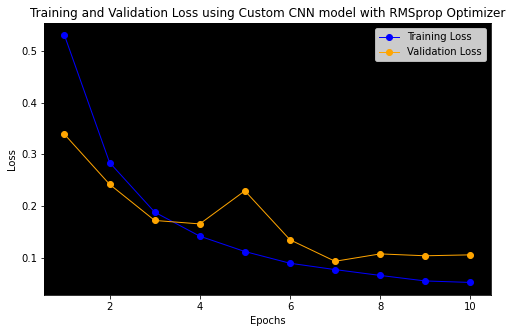

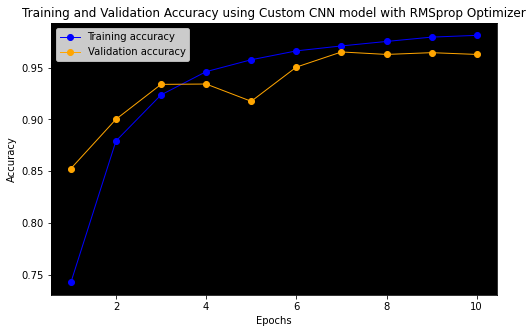

In [15]:
accuracy_graph(range(1, len(loss) + 1), loss, val_loss)
loss_graphs(range(1, len(loss) + 1), acc, val_acc)

**Step 11: Calculating Prediction using trained model on Test Data set**

In [18]:
y_pred = model.predict(test_data)
y_test = test_data.classes

**Step 12: Classification Report**

In [19]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred> 0.5))

ROC AUC Score: 0.9950722149999999
AP Score: 0.9948641734084468

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     10000
           1       0.95      0.98      0.97     10000

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



**Step 12: Classification Report**

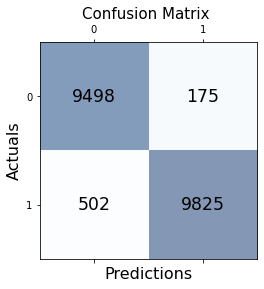

In [20]:
#Also plotting confusion matrix, for checking True positive, True Negative , False positive and False negative values based
# on the model prediction

Confusion_matrix = metrics.confusion_matrix(y_test, y_pred> 0.5)
fig, px = plt.subplots(figsize=(4, 4))
px.matshow(Confusion_matrix, cmap=plt.cm.Blues, alpha = 0.7)
for row in range(Confusion_matrix.shape[0]):
    for col in range(Confusion_matrix.shape[1]):
        px.text(x=row,y=col,s=Confusion_matrix[row, col], va='center', ha='center', size='xx-large')
plt.xlabel('Predicted Labels', fontsize=15)
plt.ylabel('Actual Labels', fontsize=15)
plt.title('Confusion Matrix ', fontsize=15)
plt.show()

**Code References:**

1.	https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
2.	https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization
3.	https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D
4.	https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
5.	https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D
6.	https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D
7.	https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten
8.	https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
9.	https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model
10.	https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
11.	https://www.kaggle.com/code/zohaib30/fake-vs-real-tensorflow-keras
12. https://keras.io/api/applications/densenet/
13. https://keras.io/api/applications/inceptionv3/
